In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pydicom
%config InlineBackend.figure_format = 'retina'

In [2]:
# Read mammography dicom images
patient_id="04"
breast_id="D"
ds = pydicom.dcmread(patient_id+"/41"+patient_id+"CC"+breast_id+"P.dcm")

In [3]:
# print the image information given in the dataset
print('DICOM header information \n')
print("kVp:",ds[0x180060].value)
print("mAs:",ds[0x181152].value)
print("Body Part Thickness [mm]:",ds[0x1811a2].value)
print("Entrance Dose [mGy]:",ds[0x408302].value)

DICOM header information 

kVp: 29
mAs: 48
Body Part Thickness [mm]: 50
Entrance Dose [mGy]: 4.298


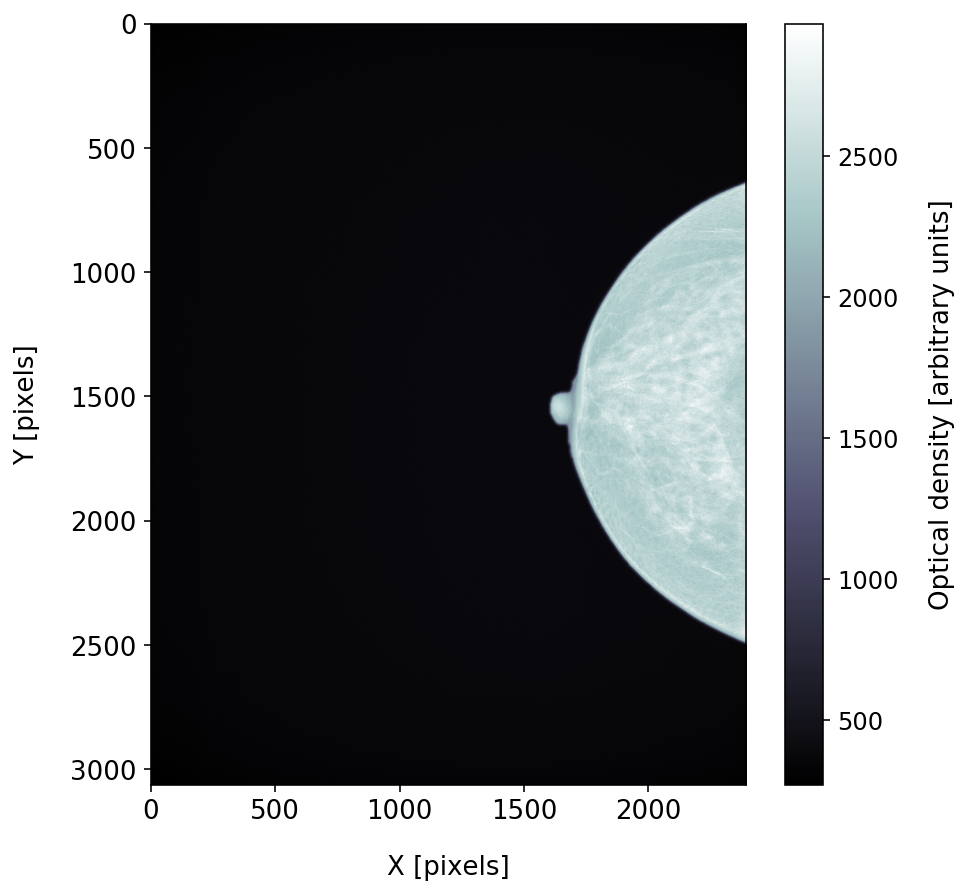

In [4]:
# Show pre-analysis images
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111)
ax.set_xlabel('X [pixels]', fontsize=13,labelpad=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylabel('Y [pixels]', fontsize=13,labelpad=15)
ax.yaxis.set_tick_params(labelsize=13)
cmap = plt.cm.bone
data = ds.pixel_array
pl=ax.imshow(data, cmap=cmap)
cbar = plt.colorbar(pl)
cbar.ax.set_ylabel('Optical density [arbitrary units]', fontsize=13,labelpad=15)
cbar.ax.yaxis.set_tick_params(labelsize=12)
plt.show()

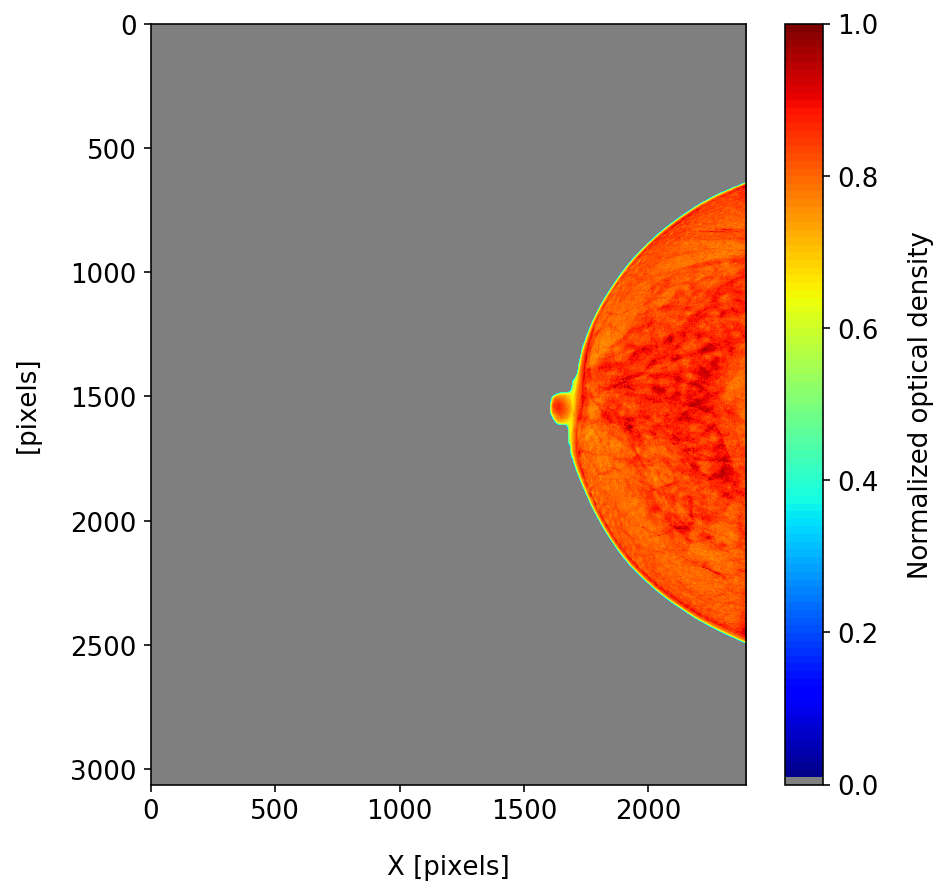

961603


In [5]:
# Normalize dataset to [0,1]
data = data/data.max()
#data=(data>0.1)*(data<0.85)*data
data=(data>0.3)*data
# Plot 10 bin step segmented images
#
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111)
ax.set_xlabel('X [pixels]', fontsize=13,labelpad=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylabel('[pixels]', fontsize=13,labelpad=15)
ax.yaxis.set_tick_params(labelsize=13)
# Customize the color map
# read a predefined colormap
cmap = plt.cm.jet
# extract all colors from map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the last color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)
# create the new map
levels=100
cmap = mpl.colors.LinearSegmentedColormap.from_list(
'Custom cmap', cmaplist, levels)
pl=ax.imshow(data, cmap=cmap,vmin=0,vmax=1)
cbar = plt.colorbar(pl)
cbar.ax.set_ylabel('Normalized optical density', fontsize=13,labelpad=15)
cbar.ax.yaxis.set_tick_params(labelsize=13)
plt.show()
print((data>0.0).sum())

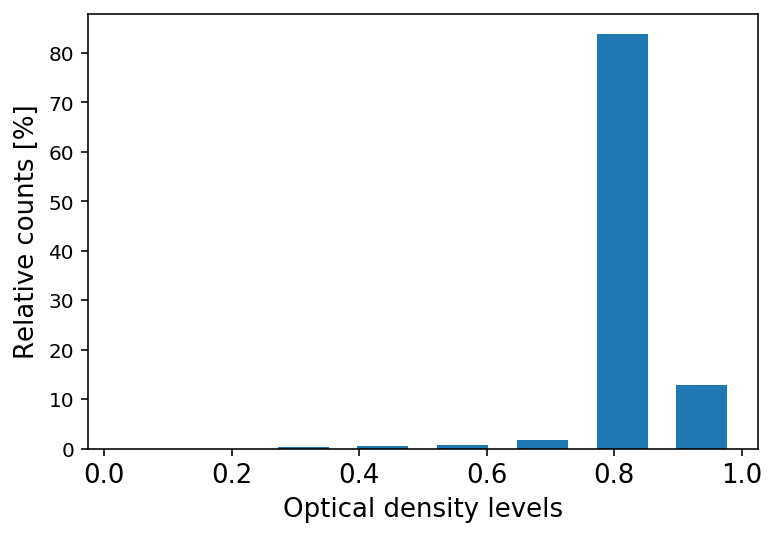

In [6]:
histo=np.histogram(data[data>0], bins=np.linspace(0, 1,9))
amplitudes=100*histo[0]/histo[0].sum()
bins=(histo[1][1:]+histo[1][:-1])/2
plt.xlabel("Optical density levels", fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Relative counts [%]", fontsize=13)
plt.xticks(fontsize=13)
plt.bar(bins,amplitudes,width=0.08)
plt.show()

In [7]:
# Count total entries above 0.1
entries = (data>0.0).sum()
print(entries)
sorted_idata = np.sort(data.ravel())
reverse_idata = sorted_idata[::-1]

min_value = reverse_idata[int(entries*0.90)]
max_value = reverse_idata[int(entries*0.01)]

print(min_value)
print(max_value)

mask1=(data[data>max_value]>max_value)
data[data>max_value] = max_value*mask1
mask2=(data[data<min_value]<=min_value)*(data[data<min_value]>0)
data[data<min_value] = min_value*mask2

961603
0.7858585858585858
0.9228956228956229


In [8]:
print(data[data!=0].min())
print(data.max())

data[data!=0] = data[data!=0]-min_value+0.01
max_value=data.max()
data = data/max_value

print(data.min())
print(data.max())
(data>0.0).sum()

0.7858585858585858
0.9228956228956229
0.0
1.0


961603

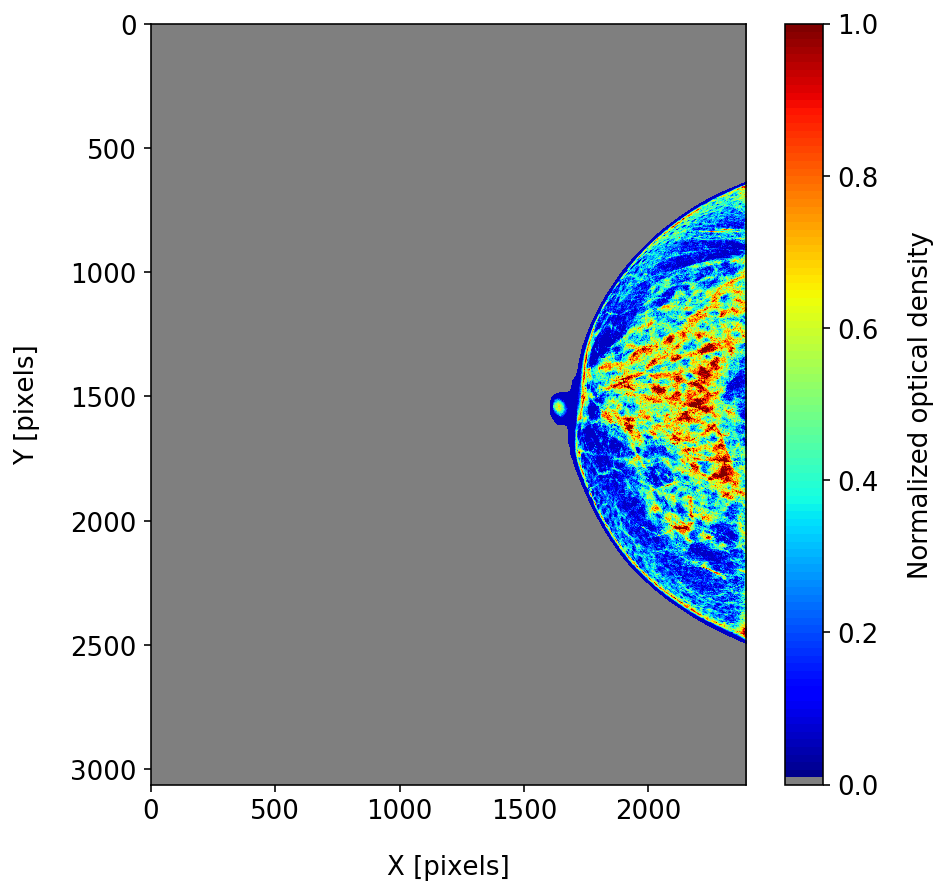

In [9]:
# Plot 10 bin step segmented images
#
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111)
ax.set_xlabel('X [pixels]', fontsize=13,labelpad=15)
ax.set_ylabel('Y [pixels]', fontsize=13,labelpad=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)
# Customize the color map
# read a predefined colormap
cmap = plt.cm.jet
# extract all colors from map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the last color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)
# create the new map
levels=100
cmap = mpl.colors.LinearSegmentedColormap.from_list(
'Custom cmap', cmaplist, levels)
pl=ax.imshow(data, cmap=cmap,vmin=0.0,vmax=1)
cbar=plt.colorbar(pl)
cbar.ax.set_ylabel('Normalized optical density', fontsize=13,labelpad=15)
cbar.ax.yaxis.set_tick_params(labelsize=13)
plt.show()

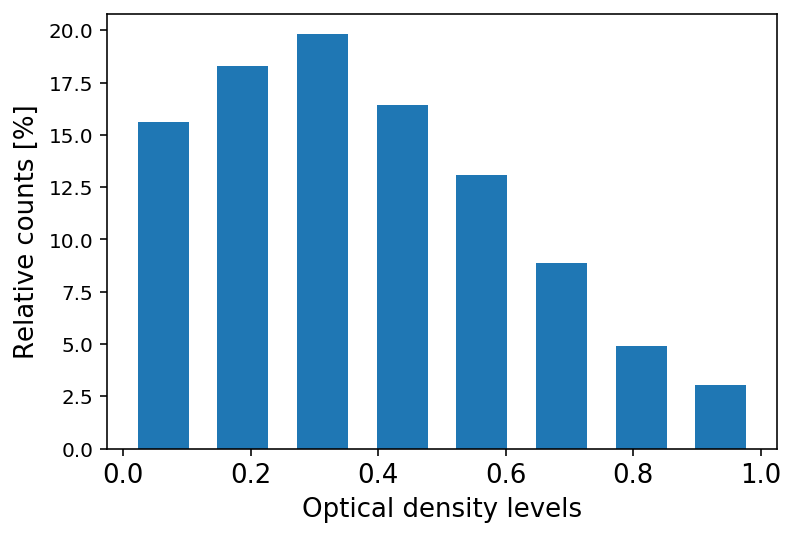

In [10]:
histo=np.histogram(data[data>0], bins=np.linspace(0, 1,9))
amplitudes=100*histo[0]/histo[0].sum()
bins=(histo[1][1:]+histo[1][:-1])/2
plt.xlabel("Optical density levels", fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Relative counts [%]", fontsize=13)
plt.xticks(fontsize=13)
plt.bar(bins,amplitudes,width=0.08)
plt.show()

In [11]:
def sigm(x,a,b):
    return 1.0/(1+np.exp(-10*a*(x-b)))

def plot_sigm(a,b):
    x=np.linspace(0,1,500)
    y=sigm(x,a,b)
    plt.figure(figsize=(10,4))
    for i in range(10):
        plt.axvline(i/10.,color='k',alpha=0.1,linestyle='dotted')
    plt.plot(x,y,label="Glandular Tissue")
    plt.plot(x,1-y,label="Adipose Tissue")
    plt.ylim(top=1.2,bottom=-.2)
    plt.xlabel("Optical density levels", fontsize=13)
    plt.xticks(fontsize=13)
    plt.ylabel("Weight", fontsize=13)
    plt.xticks(fontsize=13)
    plt.legend()
    plt.show()

In [12]:
import ipywidgets as widgets
button=widgets.FloatSlider(
value=1,
min=0.,
max=10.0,
step=.1,
description='a:',
disabled=False,
continuous_update=False,
orientation='horizontal',
readout=True,
readout_format='.1f',
)
button2=widgets.FloatSlider(
value=0.5,
min=0,
max=1,
step=0.05,
description='b:',
readout=True,
readout_format='.1f',
)

In [13]:
from ipywidgets import interact
interact(plot_sigm,a=button,b=button2);

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a:', max=10.0, readout_form…

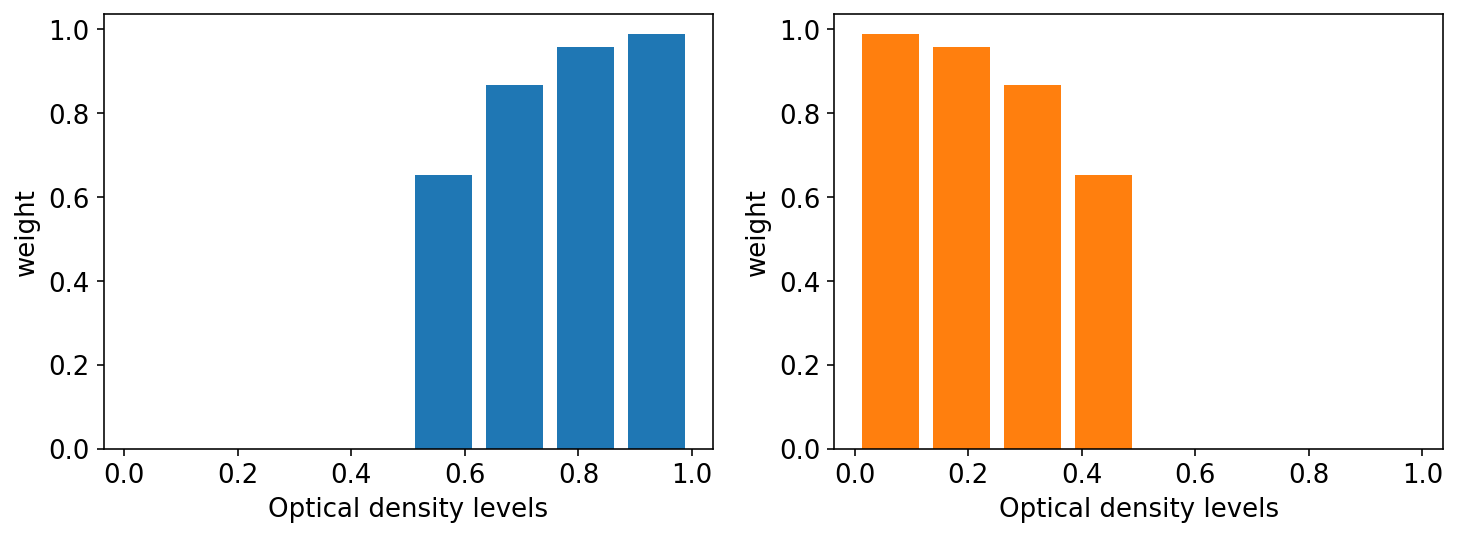

In [14]:
Sol=np.array([button.value,button2.value])
weights=sigm(bins,*Sol)
fig=plt.figure(figsize=(12,4))

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xlabel("Optical density levels", fontsize=13)
ax1.xaxis.set_tick_params(labelsize=13)
ax1.set_ylabel("weight", fontsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax1.bar(bins,weights*(weights>0.5),width=0.1);
ax2.set_xlabel("Optical density levels", fontsize=13)
ax2.xaxis.set_tick_params(labelsize=13)
ax2.set_ylabel("weight", fontsize=13)
ax2.yaxis.set_tick_params(labelsize=13)
ax2.bar(bins,(1-weights)*(weights<0.5),color='C1',width=0.1);

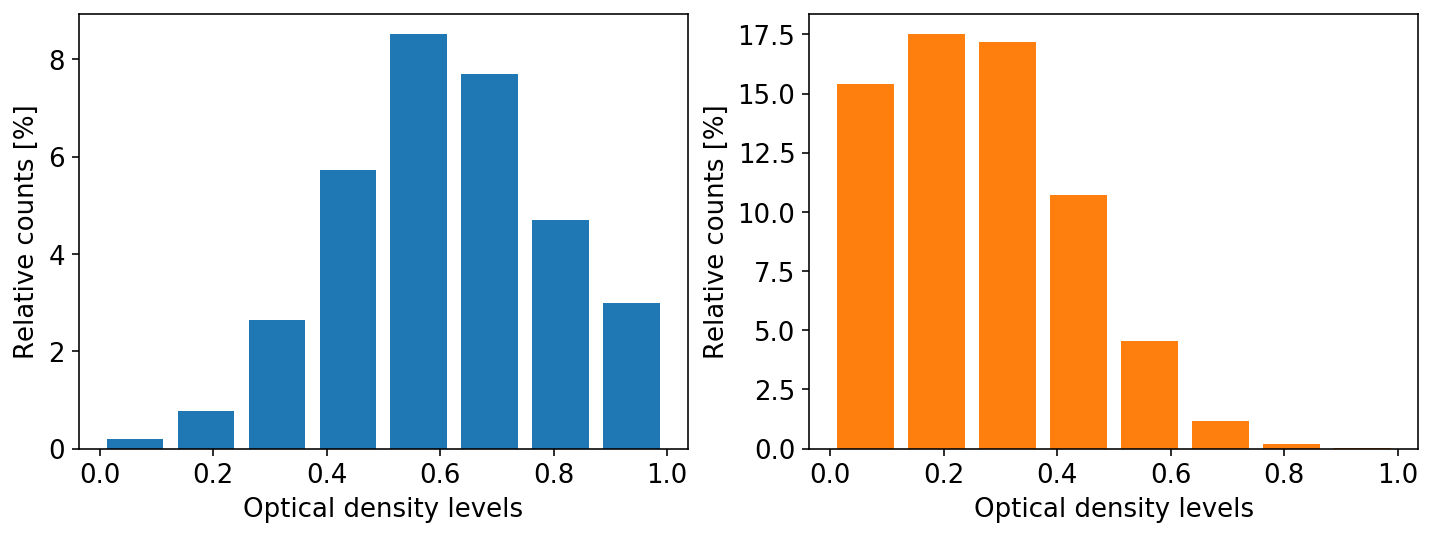

In [15]:
y1=weights*amplitudes
y2=(1-weights)*amplitudes
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xlabel("Optical density levels", fontsize=13)
ax1.xaxis.set_tick_params(labelsize=13)
ax1.set_ylabel("Relative counts [%]", fontsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax1.bar(bins,y1,width=0.1)
ax2.set_xlabel("Optical density levels", fontsize=13)
ax2.xaxis.set_tick_params(labelsize=13)
ax2.set_ylabel("Relative counts [%]", fontsize=13)
ax2.yaxis.set_tick_params(labelsize=13)
ax2.bar(bins,y2,color='C1',width=0.1);

In [16]:
print('Density Estimation Results \n')
glandular_tissue=int(y1.sum().round(0))
print(f"Glandular Tissue: {glandular_tissue}%")
adipose_tissue=int(y2.sum().round(0))
print(f"Adipose Tissue: {adipose_tissue}%")

Density Estimation Results 

Glandular Tissue: 33%
Adipose Tissue: 67%


In [17]:
print(f"Estimated breast density: {glandular_tissue}%")
if(glandular_tissue<25):
    BIRADS="A"
if(glandular_tissue>=25 and glandular_tissue<50):
    BIRADS="B"
if(glandular_tissue>=50 and glandular_tissue<75):
    BIRADS="C"
if(glandular_tissue>75):
    BIRADS="D"
print(f"BI-RADS: {BIRADS}")

Estimated breast density: 33%
BI-RADS: B
